# Plot Results

In [67]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import re

import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import  random
from random import randint

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [68]:
def extract_numbers(input_string):
    numbers = re.findall(r'\d+\.\d+|\d+', input_string)
    numbers = [float(num) if '.' in num else int(num) for num in numbers]
    return numbers

# COVID-19

In [69]:
dataset = 'COVID-19'

if dataset == 'Synthetic':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Multitasking.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW.xlsx"
elif dataset =='COVID-19':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-covid.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-covid.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-covid.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-covid.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-covid-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-covid.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-covid.xlsx"
elif dataset =='Diabetes':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-diabetes.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-diabetes.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-diabetes.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-diabetes.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-diabetes-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-diabetes.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-diabetes.xlsx"
    

# Comparision among standard practice and proposed solutions

### Average Performance Across all Settings

Combine data from scale as well as rate settings

In [70]:
# data from scale settings
# read all
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
# df['TNet-Censored'] = data_tnet1['Predicted Sensored']
# df['Censored'] = data_tnet1['Actual Sensored']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
# df['MTNet-Censored'] = data_MT['Predicted Sensored']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df_stdu = df[['Naive', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdu['Method'] = ['Naive' for i in range(len(df_stdu))]
df_stdu.rename(columns={'Naive': 'AUROC'}, inplace=True)

df_stdb = df[['Oracle', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdb['Method'] = ['Oracle' for i in range(len(df_stdb))]
df_stdb.rename(columns={'Oracle': 'AUROC'}, inplace=True)

df_mtnetc = df[['MTNet(C)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtnetc['Method'] = ['MTNet(C)' for i in range(len(df_mtnetc))]
df_mtnetc.rename(columns={'MTNet(C)': 'AUROC'}, inplace=True)
df_mtneti = df[['MTNet(I)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtneti['Method'] = ['MTNet(I)' for i in range(len(df_mtneti))]
df_mtneti.rename(columns={'MTNet(I)': 'AUROC'}, inplace=True)

df_tnet = df[['TNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_tnet['Method'] = ['TNet' for i in range(len(df_tnet))]
df_tnet.rename(columns={'TNet': 'AUROC'}, inplace=True)

df_adv = df[['AdvNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['AdvNet' for i in range(len(df_adv))]
df_adv.rename(columns={'AdvNet': 'AUROC'}, inplace=True)

df_kmm = df[['KMM', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP': 'AUROC'}, inplace=True)

df_ipw = df[['IPW', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_ipw['Method'] = ['IPW' for i in range(len(df_ipw))]
df_ipw.rename(columns={'IPW': 'AUROC'}, inplace=True)

df_impute = df[['Imputation', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_impute['Method'] = ['Imputation' for i in range(len(df_impute))]
df_impute.rename(columns={'Imputation': 'AUROC'}, inplace=True)

data = pd.concat([df_stdu, df_stdb, df_mtnetc, df_mtneti, df_tnet, df_adv, df_kmm, df_kliep, df_ipw, df_impute], axis=0, ignore_index=True).reset_index()

data = data.replace('AdvNet', 'DANN')
data = data.replace('MTNet(C)', 'MT-Naive')
data = data.replace('MTNet(I)', 'MT-Net')
data = data.replace('TNet', 'T-Net')

data


,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method
0,0,0.650170,15000.0,0.05,0.05,Naive
1,1,0.646885,15000.0,0.05,0.05,Naive
2,2,0.650721,15000.0,0.05,0.05,Naive
3,3,0.639043,15000.0,0.05,0.05,Naive
4,4,0.626459,15000.0,0.05,0.05,Naive
...,...,...,...,...,...,...
12495,12495,0.612632,1000.0,0.40,0.40,Imputation
12496,12496,0.628750,1000.0,0.40,0.40,Imputation
12497,12497,0.623216,1000.0,0.40,0.40,Imputation
12498,12498,0.620395,1000.0,0.40,0.40,Imputation


In [71]:
data.groupby(by=['Method']).median()

,index,AUROC,Dataset Size,Risk Rate,Censoring Rate
Method,,,,,
DANN,6874.5,0.636386,5000.0,0.2,0.2
IPW,10624.5,0.623731,5000.0,0.2,0.2
Imputation,11874.5,0.548692,5000.0,0.2,0.2
KLIEP,9374.5,0.638187,5000.0,0.2,0.2
KMM,8124.5,0.587251,5000.0,0.2,0.2
MT-Naive,3124.5,0.630675,5000.0,0.2,0.2
MT-Net,4374.5,0.630718,5000.0,0.2,0.2
Naive,624.5,0.621898,5000.0,0.2,0.2
Oracle,1874.5,0.636210,5000.0,0.2,0.2


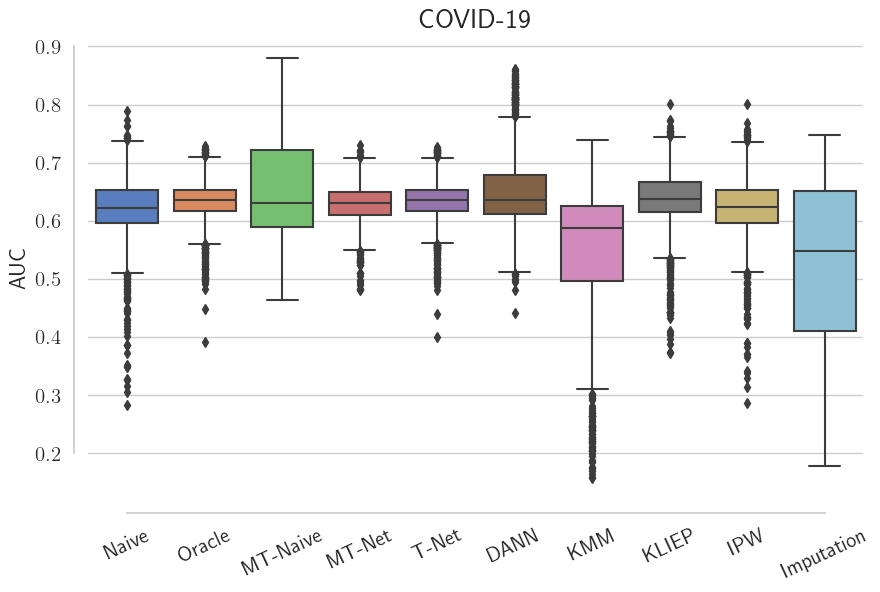

In [72]:
#########################################################
ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(10,6))
# sns.set(font_scale = 10)
# sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="whitegrid", palette="muted")
# sns.set(style="darkgrid")

# plot AUROC
p = sns.boxplot(x="Method", y="AUROC",
            palette=sns.color_palette(),
            data=data)
sns.despine(offset=10, trim=True)
# p.set_ylabel("AUROC", fontsize = 20)
# p.set_xlabel("% Irregularity", fontsize = 20)
# p.set_title("Plot", fontsize = 20)
# plt.legend(labels=["COPER","Perceiver","LSTM"], fontsize = 20)

# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3, frameon=False, fontsize=20)
# plt.legend(loc="lower left", frameon=True, fontsize=16)
# plt.xlabel('Model', fontsize=16)
ax.set(xlabel=None)
plt.ylabel('AUC', fontsize=16)
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)#, ticks=np.arange(0.55, 1, step=0.05))
plt.title('COVID-19', fontsize = 20)
plt.savefig(dataset + '.pdf', dpi=300,bbox_inches='tight')

#######################################################################################

## Risk rate vs censoring rate

In [73]:
# read all and put in a format with method as a column and performance under AUROC
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
df['TNet-Censored'] = data_tnet1['C-Test AUROC']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
df['MTNet(I)-Censored'] = data_MT1['C-Test AUROC-U']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df = df.groupby(['Risk Rate', 'Censoring Rate'], as_index=False).mean().reset_index()

df = df.rename(columns={'AdvNet': 'DANN'})
df = df.rename(columns={'MTNet(C)': 'MT-Naive'})
df = df.rename(columns={'MTNet(I)': 'MT-Net'})
df = df.rename(columns={'TNet': 'T-Net'})
df = df.rename(columns={'MTNet(I)-Censored': 'MT-Net-Censored'})
df = df.rename(columns={'TNet-Censored': 'T-Net-Censored'})

df

,index,Risk Rate,Censoring Rate,Naive,Oracle,T-Net,T-Net-Censored,MT-Net,MT-Naive,MT-Net-Censored,DANN,KMM,KLIEP,IPW,Imputation,Dataset Size
0,0,0.05,0.05,0.624336,0.624682,0.622412,0.996129,0.601081,0.580927,0.994112,0.585075,0.624037,0.648601,0.622135,0.622865,6600.0
1,1,0.05,0.10,0.662634,0.677639,0.676015,0.993310,0.659941,0.592465,0.995556,0.619694,0.619492,0.693777,0.653441,0.692010,6600.0
2,2,0.05,0.20,0.635441,0.654559,0.653960,0.998702,0.641930,0.735097,0.998513,0.705684,0.578382,0.695081,0.621447,0.450984,6600.0
3,3,0.05,0.30,0.594689,0.624187,0.624072,0.999588,0.650131,0.847271,0.998807,0.790493,0.404294,0.633526,0.606504,0.313087,6600.0
4,4,0.05,0.40,0.578017,0.638870,0.639322,0.999460,0.646133,0.865655,0.999067,0.762016,0.337297,0.536592,0.583966,0.250355,6600.0
5,5,0.10,0.05,0.611677,0.623874,0.623923,0.984912,0.620588,0.589325,0.991251,0.607095,0.596920,0.629314,0.624392,0.639600,6600.0
6,6,0.10,0.10,0.596596,0.617155,0.617977,0.997522,0.603622,0.541660,0.994708,0.573117,0.610620,0.623424,0.601658,0.653189,6600.0
7,7,0.10,0.20,0.610371,0.637483,0.637105,0.999480,0.633959,0.679839,0.998617,0.653131,0.530093,0.619831,0.617492,0.481683,6600.0
8,8,0.10,0.30,0.624019,0.585981,0.585531,0.999268,0.583078,0.773893,0.998286,0.725550,0.513787,0.633782,0.626783,0.318127,6600.0
9,9,0.10,0.40,0.560899,0.604490,0.602969,0.999572,0.607022,0.819969,0.998738,0.768194,0.290442,0.549530,0.588755,0.246821,6600.0


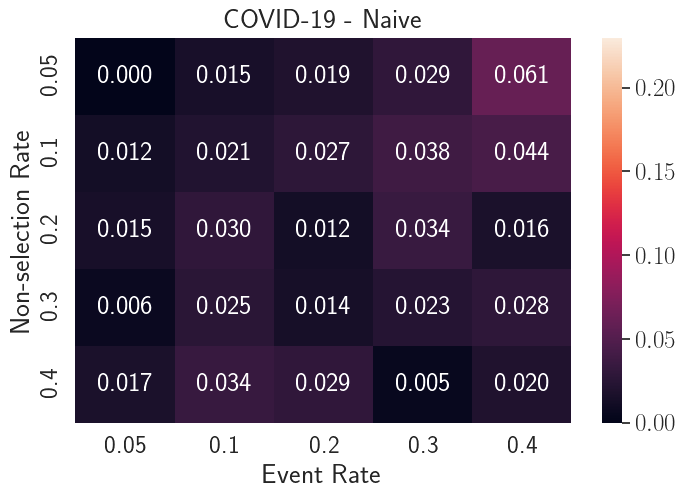

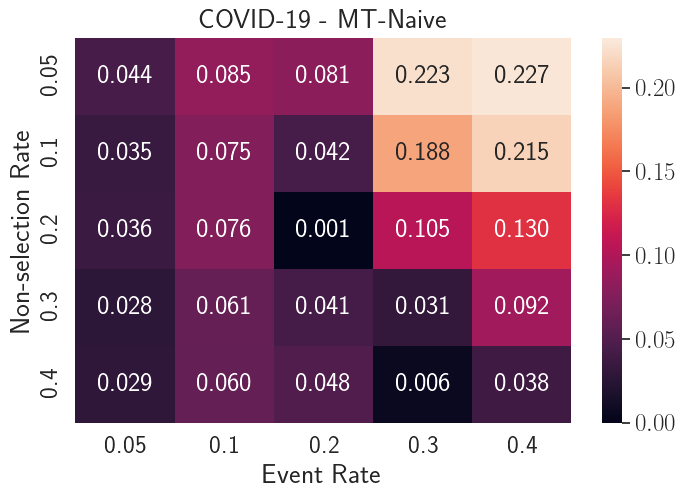

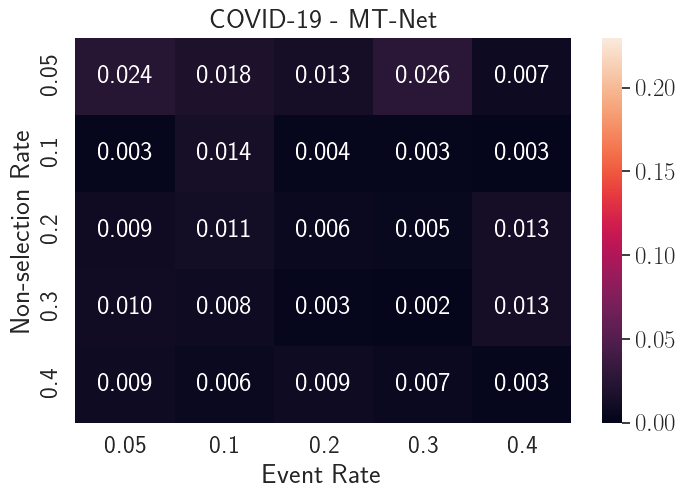

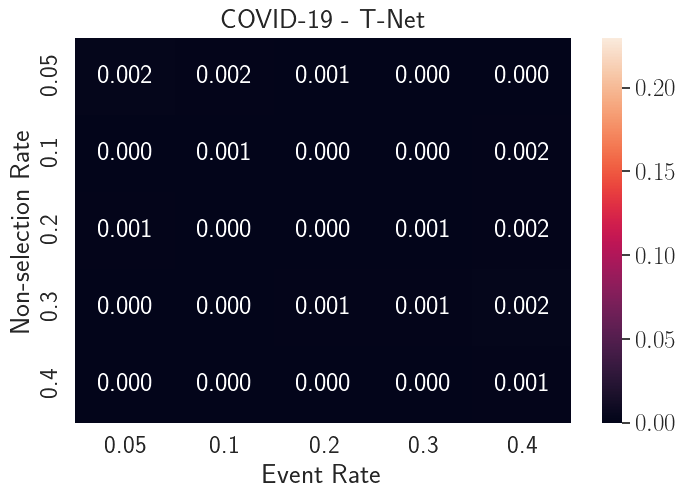

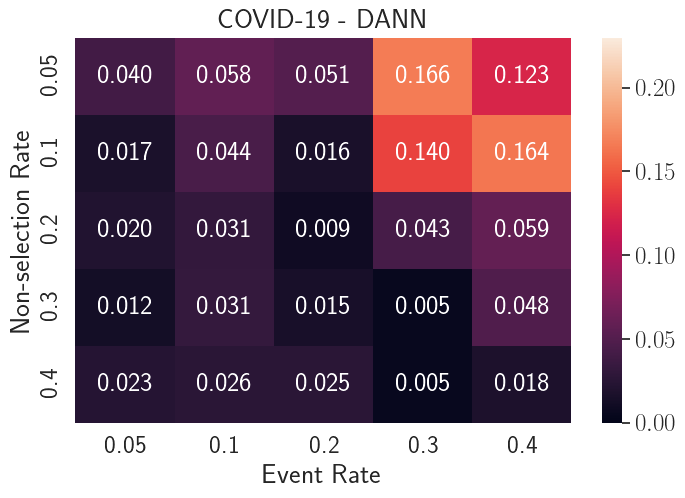

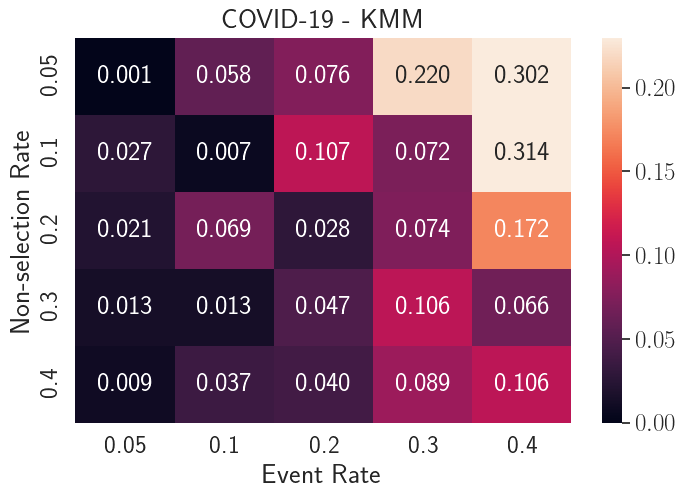

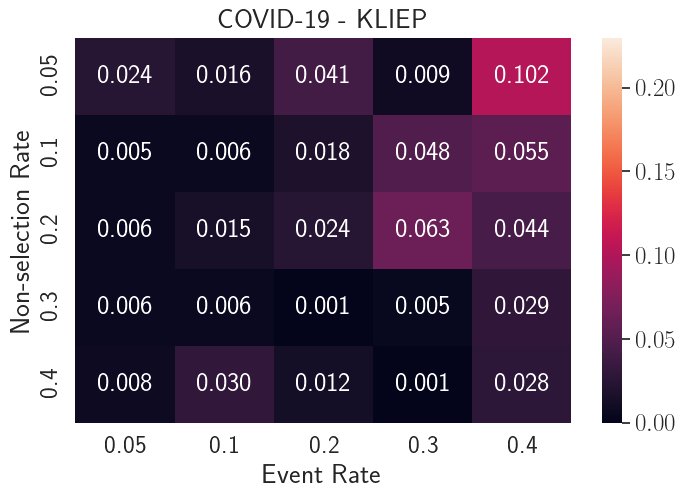

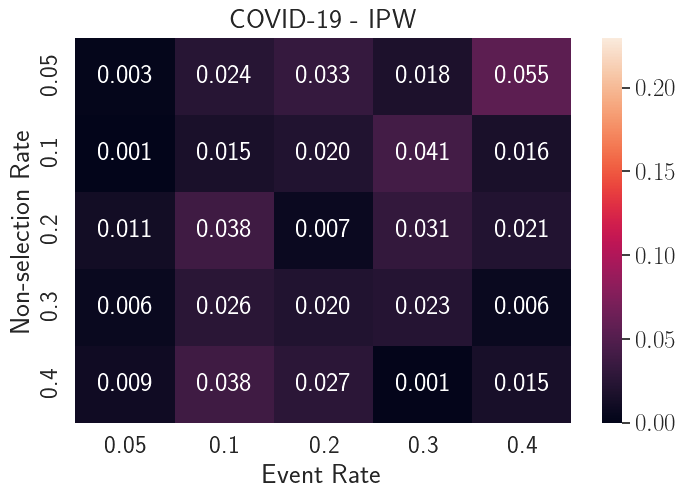

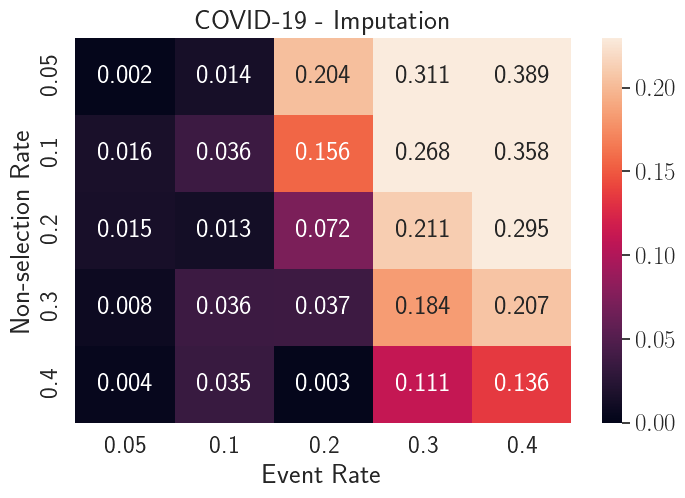

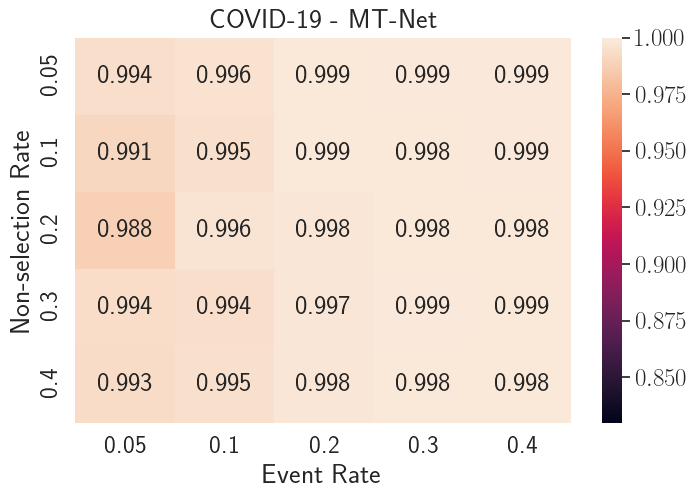

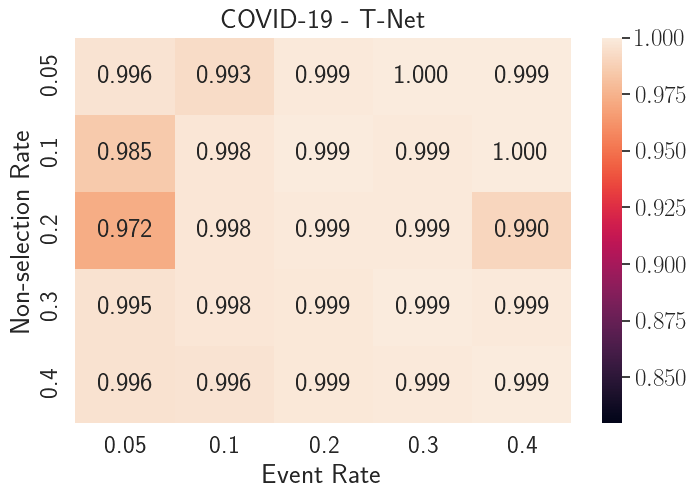

In [74]:
#######################################################################################

def plot_risk_vs_censoring_R(data, sheet_name, method, vmin, vmax):
    # print(data)
    data = data[[method, 'Oracle', 'Censoring Rate', 'Risk Rate']]
    data['AUROC'] = abs(data['Oracle'] - data[method])
    # data['Censored'] = data[method+'-Censored']-data['Censored']
    data = data.drop([method, 'Oracle'], axis=1)
    # plot AUROC
    ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(8,5))
    # sns.set(font_scale = 10)
    # sns.set_theme(style="ticks", palette="pastel")
    sns.set_theme(style="whitegrid", palette="muted")
    df1 = data.pivot(index="Risk Rate", columns="Censoring Rate", values="AUROC")
    ax = sns.heatmap(df1, vmin=vmin, vmax=vmax, annot=True, fmt=f'.{3}f', annot_kws={"size": 19, "ha": 'center'})
    cax = ax.figure.axes[-1]
    cax.tick_params(labelsize=18)

    # plt.axhline(y=0, color='r', linestyle='--', label='Horizontal Line at y=6')
    # plt.legend(loc="lower right", frameon=True, fontsize=16)
    # sns.move_legend(ax, "center")
    plt.xlabel('Event Rate', fontsize=20)
    # ax.set(xlabel=None)
    plt.ylabel('Non-selection Rate', fontsize=20)
    # ax.set_ylim([.45, .55])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(sheet_name + ' - ' + method, fontsize=20)
    # Turns off grid on the left Axis.
    ax.grid(False)

    plt.savefig(sheet_name + '-R-' + method + '.pdf',dpi=300, bbox_inches='tight')


def plot_risk_vs_censoring_C(data, sheet_name, method, vmin, vmax):
    data = data[[method +'-Censored', 'Censoring Rate', 'Risk Rate']]
    data['AUROC'] = data[method +'-Censored']
    data = data.drop([method +'-Censored'], axis=1)
    # plot AUROC
    ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(8,5))
    # sns.set(font_scale = 10)
    # sns.set_theme(style="ticks", palette="pastel")
    sns.set_theme(style="whitegrid", palette="muted")
    df1 = data.pivot(index="Risk Rate", columns="Censoring Rate", values="AUROC")
    ax = sns.heatmap(df1, vmin=vmin, vmax=vmax, annot=True, fmt=f'.{3}f', annot_kws={"size": 19, "ha": 'center'})
    ax.tick_params(labelsize=18)
    cax = ax.figure.axes[-1]
    cax.tick_params(labelsize=18)


    # plt.axhline(y=0, color='r', linestyle='--', label='Horizontal Line at y=6')
    # plt.legend(loc="lower right", frameon=True, fontsize=16)
    # sns.move_legend(ax, "center")
    plt.xlabel('Event Rate', fontsize=20)
    # ax.set(xlabel=None)
    plt.ylabel('Non-selection Rate', fontsize=20)
    # ax.set_ylim([.45, .55])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(sheet_name + ' - ' + method, fontsize=20)
    # Turns off grid on the left Axis.
    ax.grid(False)

    plt.savefig(sheet_name + '-C-' + method + '.pdf',dpi=300, bbox_inches='tight')

#######################################################################################

plot_risk_vs_censoring_R(df, dataset, 'Naive', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'MT-Naive', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'MT-Net', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'T-Net', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'DANN', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'KMM', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'KLIEP', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'IPW', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'Imputation', vmin=0.0, vmax=0.23)

plot_risk_vs_censoring_C(df, dataset, 'MT-Net', vmin=0.83, vmax=1.0)
plot_risk_vs_censoring_C(df, dataset, 'T-Net', vmin=0.83, vmax=1.0)

# Diabetes

In [77]:
dataset = 'Diabetes'

if dataset == 'Synthetic':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Multitasking.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW.xlsx"
elif dataset =='COVID-19':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-covid.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-covid.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-covid.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-covid.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-covid-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-covid.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-covid.xlsx"
elif dataset =='Diabetes':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-diabetes.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-diabetes.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-diabetes.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-diabetes.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-diabetes-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-diabetes.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-diabetes.xlsx"
    
    

### Summary plot

In [78]:
# data from scale settings
# read all
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
# df['TNet-Censored'] = data_tnet1['Predicted Sensored']
# df['Censored'] = data_tnet1['Actual Sensored']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
# df['MTNet-Censored'] = data_MT['Predicted Sensored']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df_stdu = df[['Naive', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdu['Method'] = ['Naive' for i in range(len(df_stdu))]
df_stdu.rename(columns={'Naive': 'AUROC'}, inplace=True)

df_stdb = df[['Oracle', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdb['Method'] = ['Oracle' for i in range(len(df_stdb))]
df_stdb.rename(columns={'Oracle': 'AUROC'}, inplace=True)

df_mtnetc = df[['MTNet(C)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtnetc['Method'] = ['MTNet(C)' for i in range(len(df_mtnetc))]
df_mtnetc.rename(columns={'MTNet(C)': 'AUROC'}, inplace=True)
df_mtneti = df[['MTNet(I)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtneti['Method'] = ['MTNet(I)' for i in range(len(df_mtneti))]
df_mtneti.rename(columns={'MTNet(I)': 'AUROC'}, inplace=True)

df_tnet = df[['TNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_tnet['Method'] = ['TNet' for i in range(len(df_tnet))]
df_tnet.rename(columns={'TNet': 'AUROC'}, inplace=True)

df_adv = df[['AdvNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['AdvNet' for i in range(len(df_adv))]
df_adv.rename(columns={'AdvNet': 'AUROC'}, inplace=True)

df_kmm = df[['KMM', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP': 'AUROC'}, inplace=True)

df_ipw = df[['IPW', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_ipw['Method'] = ['IPW' for i in range(len(df_ipw))]
df_ipw.rename(columns={'IPW': 'AUROC'}, inplace=True)

df_impute = df[['Imputation', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_impute['Method'] = ['Imputation' for i in range(len(df_impute))]
df_impute.rename(columns={'Imputation': 'AUROC'}, inplace=True)

data = pd.concat([df_stdu, df_stdb, df_mtnetc, df_mtneti, df_tnet, df_adv, df_kmm, df_kliep, df_ipw, df_impute], axis=0, ignore_index=True).reset_index()

data = data.replace('AdvNet', 'DANN')
data = data.replace('MTNet(C)', 'MT-Naive')
data = data.replace('MTNet(I)', 'MT-Net')
data = data.replace('TNet', 'T-Net')

data


,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method
0,0,0.810352,25000.0,0.05,0.05,Naive
1,1,0.818029,25000.0,0.05,0.05,Naive
2,2,0.813364,25000.0,0.05,0.05,Naive
3,3,0.821492,25000.0,0.05,0.05,Naive
4,4,0.827588,25000.0,0.05,0.05,Naive
...,...,...,...,...,...,...
12495,12495,0.775629,1000.0,0.40,0.40,Imputation
12496,12496,0.775890,1000.0,0.40,0.40,Imputation
12497,12497,0.773350,1000.0,0.40,0.40,Imputation
12498,12498,0.773406,1000.0,0.40,0.40,Imputation


In [79]:
data.groupby(by=['Method']).median()

,index,AUROC,Dataset Size,Risk Rate,Censoring Rate
Method,,,,,
DANN,6874.5,0.766448,5000.0,0.2,0.2
IPW,10624.5,0.783681,5000.0,0.2,0.2
Imputation,11874.5,0.779688,5000.0,0.2,0.2
KLIEP,9374.5,0.803320,5000.0,0.2,0.2
KMM,8124.5,0.787729,5000.0,0.2,0.2
MT-Naive,3124.5,0.759948,5000.0,0.2,0.2
MT-Net,4374.5,0.800461,5000.0,0.2,0.2
Naive,624.5,0.781900,5000.0,0.2,0.2
Oracle,1874.5,0.809741,5000.0,0.2,0.2


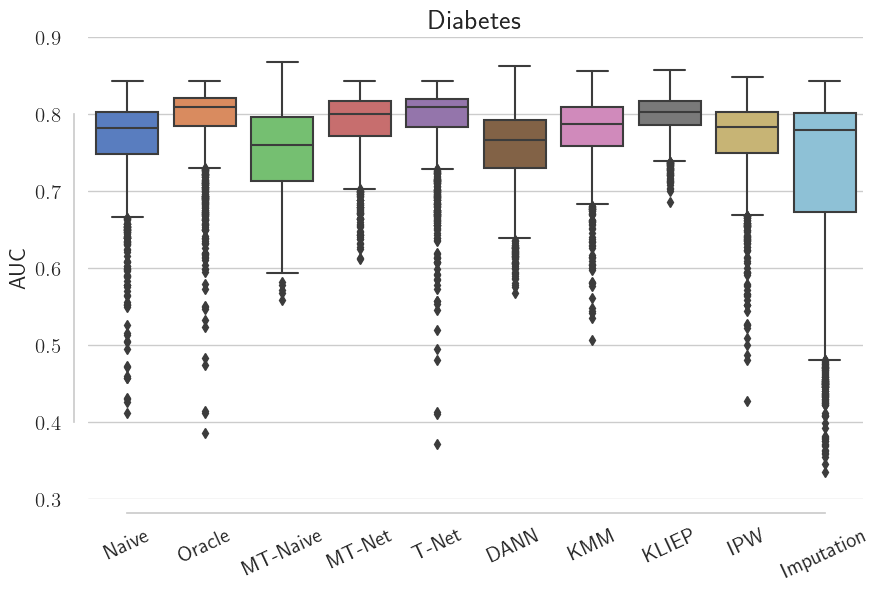

In [80]:
#########################################################
ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(10,6))
# sns.set(font_scale = 10)
# sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="whitegrid", palette="muted")
# sns.set(style="darkgrid")

# plot AUROC
p = sns.boxplot(x="Method", y="AUROC",
            palette=sns.color_palette(),
            data=data)
sns.despine(offset=10, trim=True)
# p.set_ylabel("AUROC", fontsize = 20)
# p.set_xlabel("% Irregularity", fontsize = 20)
# p.set_title("Plot", fontsize = 20)
# plt.legend(labels=["COPER","Perceiver","LSTM"], fontsize = 20)

# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3, frameon=False, fontsize=20)
# plt.legend(loc="lower left", frameon=True, fontsize=16)
# plt.xlabel('Model', fontsize=16)
ax.set(xlabel=None)
plt.ylabel('AUC', fontsize=16)
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15, ticks=np.arange(0.3, .91, step=0.1))
plt.title(dataset, fontsize = 20)
plt.savefig(dataset + '.pdf', dpi=300,bbox_inches='tight')

#######################################################################################

### Event Rate vs Selection Rate

In [81]:
# read all and put in a format with method as a column and performance under AUROC
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
df['TNet-Censored'] = data_tnet1['C-Test AUROC']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
df['MTNet(I)-Censored'] = data_MT1['C-Test AUROC-U']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df = df.groupby(['Risk Rate', 'Censoring Rate'], as_index=False).mean().reset_index()

df = df.rename(columns={'AdvNet': 'DANN'})
df = df.rename(columns={'MTNet(C)': 'MT-Naive'})
df = df.rename(columns={'MTNet(I)': 'MT-Net'})
df = df.rename(columns={'TNet': 'T-Net'})
df = df.rename(columns={'MTNet(I)-Censored': 'MT-Net-Censored'})
df = df.rename(columns={'TNet-Censored': 'T-Net-Censored'})

df

,index,Risk Rate,Censoring Rate,Naive,Oracle,T-Net,T-Net-Censored,MT-Net,MT-Naive,MT-Net-Censored,DANN,KMM,KLIEP,IPW,Imputation,Dataset Size
0,0,0.05,0.05,0.752214,0.753845,0.756794,0.998163,0.756795,0.729704,0.994608,0.723229,0.794196,0.799447,0.771358,0.780199,8600.0
1,1,0.05,0.10,0.734232,0.749058,0.749603,0.998456,0.740602,0.677425,0.998001,0.682305,0.776827,0.786828,0.735822,0.760237,8600.0
2,2,0.05,0.20,0.736102,0.781181,0.780124,0.999075,0.778593,0.695385,0.998650,0.717613,0.735971,0.790559,0.717611,0.722355,8600.0
3,3,0.05,0.30,0.750772,0.752348,0.747219,0.999108,0.755288,0.836897,0.997985,0.797872,0.797736,0.817323,0.766552,0.480204,8600.0
4,4,0.05,0.40,0.661164,0.762459,0.757981,0.999231,0.768608,0.857137,0.997409,0.800600,0.758286,0.822430,0.678019,0.432583,8600.0
5,5,0.10,0.05,0.755492,0.766179,0.765496,0.997613,0.756578,0.729792,0.997652,0.725879,0.771559,0.778467,0.762005,0.783252,8600.0
6,6,0.10,0.10,0.758059,0.782973,0.782713,0.998697,0.774903,0.707136,0.998244,0.708893,0.772533,0.775354,0.759143,0.804375,8600.0
7,7,0.10,0.20,0.759176,0.781437,0.780515,0.998921,0.786292,0.677023,0.998516,0.702726,0.743160,0.787881,0.756501,0.768766,8600.0
8,8,0.10,0.30,0.759054,0.810192,0.808111,0.999088,0.804315,0.803587,0.997855,0.798302,0.789197,0.820163,0.753631,0.558129,8600.0
9,9,0.10,0.40,0.782707,0.760424,0.759124,0.999115,0.764633,0.822523,0.997387,0.799709,0.807188,0.840343,0.784364,0.468011,8600.0


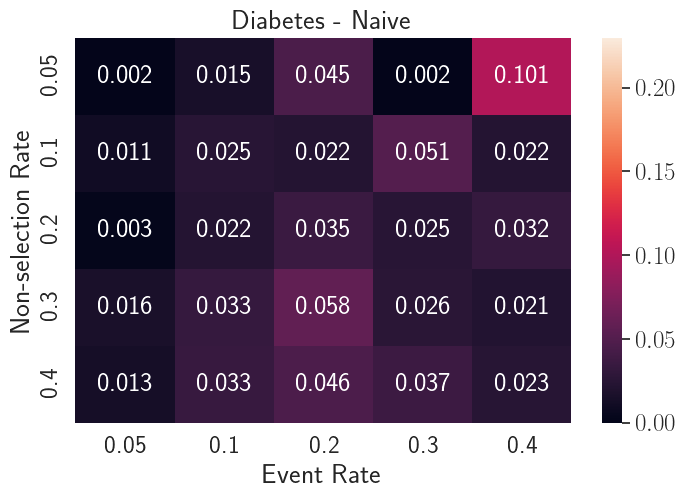

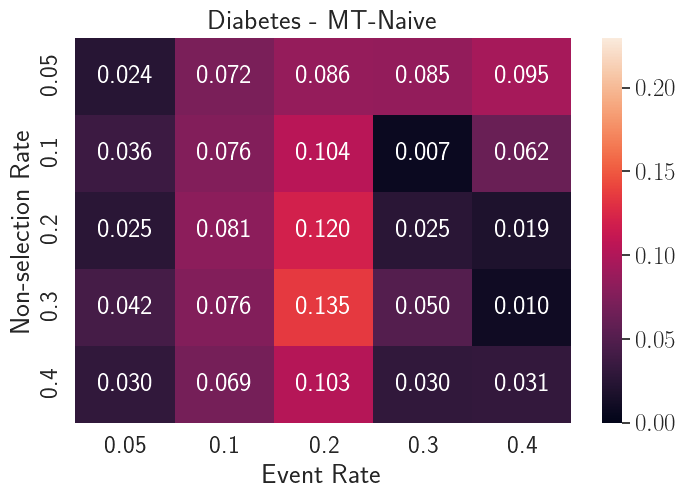

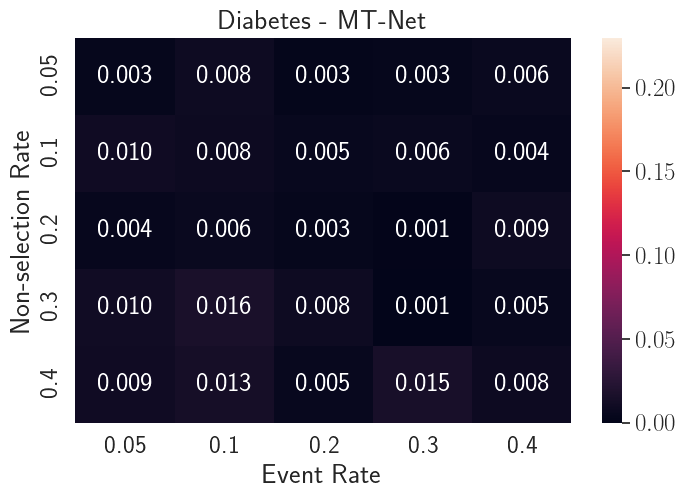

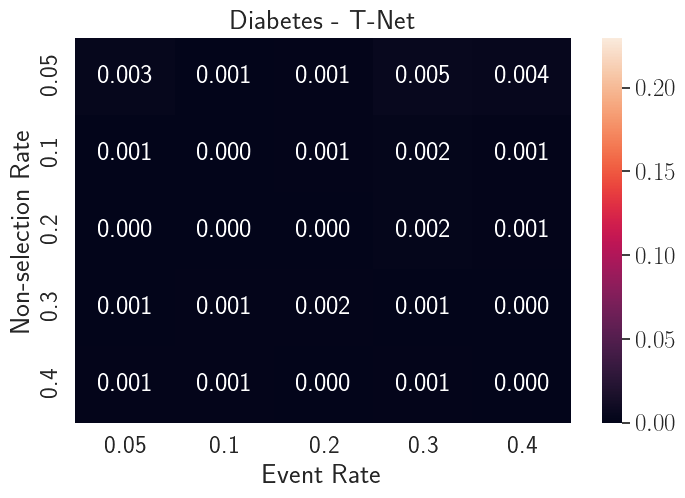

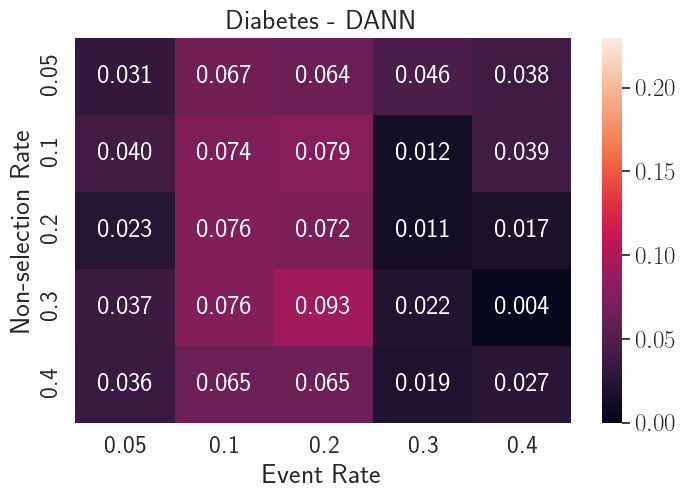

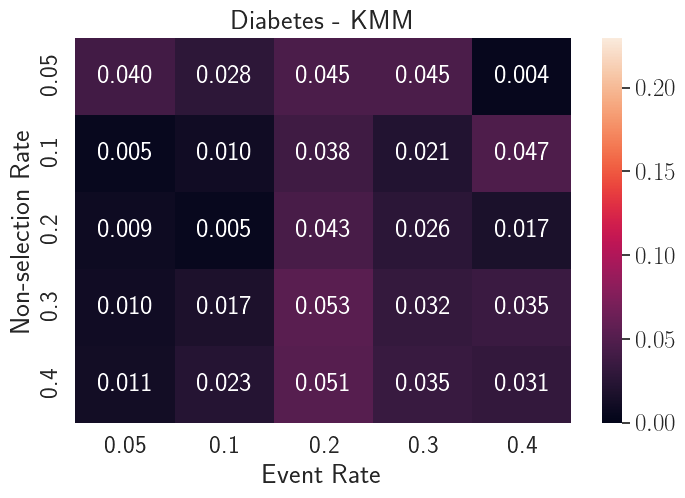

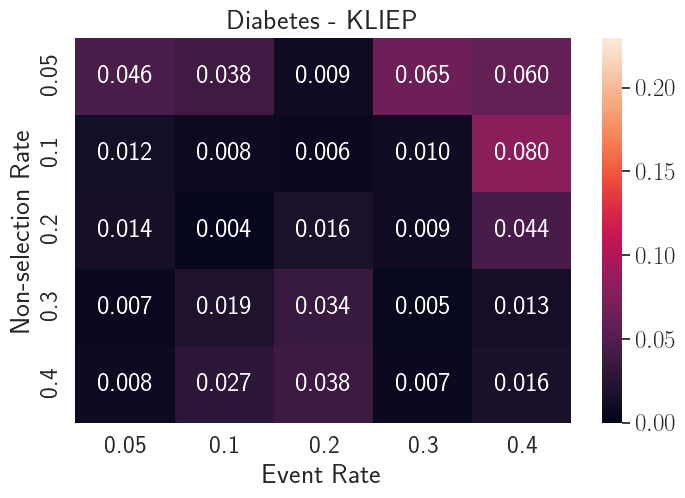

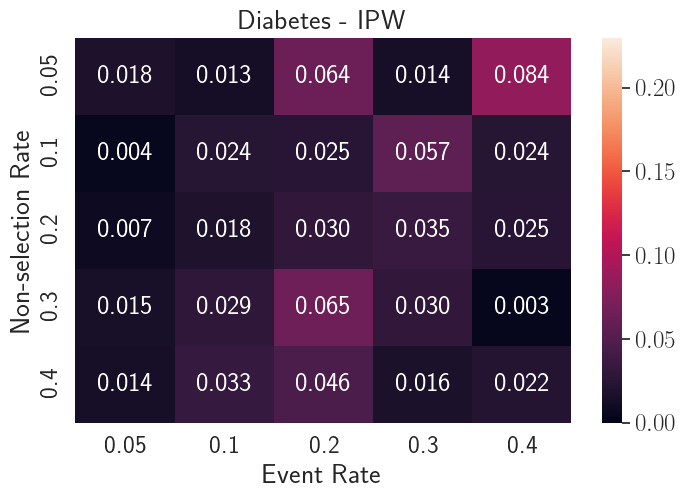

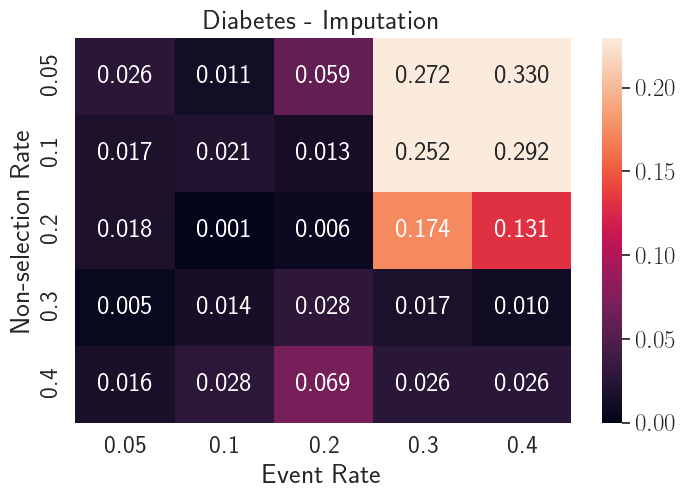

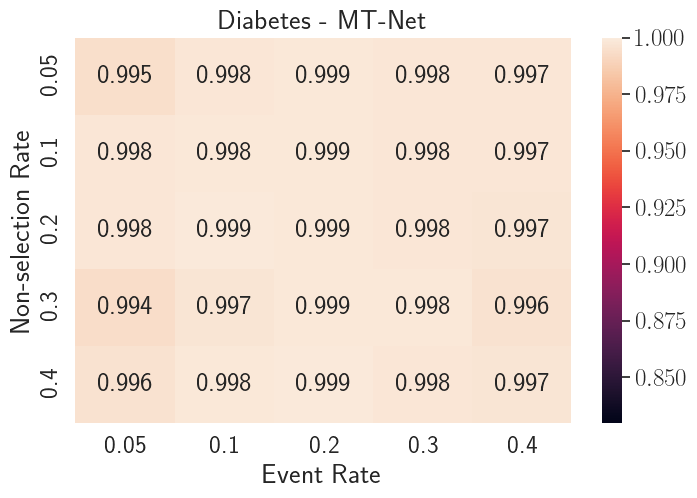

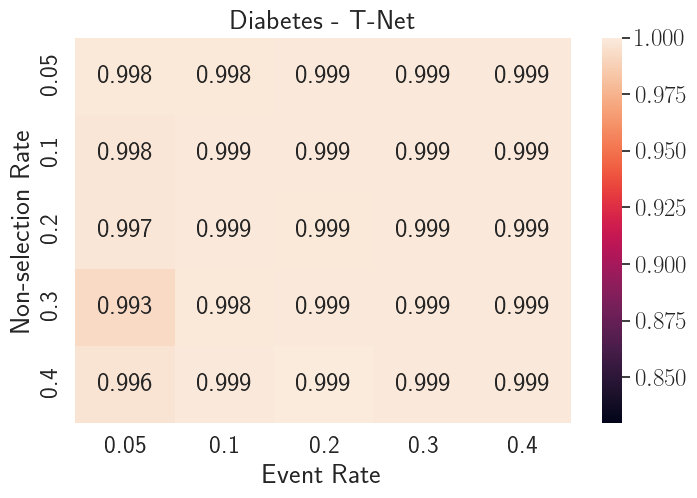

In [82]:
plot_risk_vs_censoring_R(df, dataset, 'Naive', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'MT-Naive', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'MT-Net', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'T-Net', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'DANN', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'KMM', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'KLIEP', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'IPW', vmin=0.0, vmax=0.23)
plot_risk_vs_censoring_R(df, dataset, 'Imputation', vmin=0.0, vmax=0.23)

plot_risk_vs_censoring_C(df, dataset, 'MT-Net', vmin=0.83, vmax=1.0)
plot_risk_vs_censoring_C(df, dataset, 'T-Net', vmin=0.83, vmax=1.0)

# Shared Dataset Scale Effect

In [85]:
dataset = 'COVID-19'

if dataset == 'Synthetic':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Multitasking.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW.xlsx"
elif dataset =='COVID-19':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-covid.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-covid.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-covid.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-covid.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-covid-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-covid.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-covid.xlsx"
elif dataset =='Diabetes':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-diabetes.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-diabetes.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-diabetes.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-diabetes.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-diabetes-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-diabetes.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-diabetes.xlsx"
    
    
# read all
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
# df['TNet-Censored'] = data_tnet1['Predicted Sensored']
# df['Censored'] = data_tnet1['Actual Sensored']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
# df['MTNet-Censored'] = data_MT['Predicted Sensored']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df_stdu = df[['Naive', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdu['Method'] = ['Naive' for i in range(len(df_stdu))]
df_stdu.rename(columns={'Naive': 'AUROC'}, inplace=True)

df_stdb = df[['Oracle', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdb['Method'] = ['Oracle' for i in range(len(df_stdb))]
df_stdb.rename(columns={'Oracle': 'AUROC'}, inplace=True)

df_mtnetc = df[['MTNet(C)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtnetc['Method'] = ['MTNet(C)' for i in range(len(df_mtnetc))]
df_mtnetc.rename(columns={'MTNet(C)': 'AUROC'}, inplace=True)
df_mtneti = df[['MTNet(I)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtneti['Method'] = ['MTNet(I)' for i in range(len(df_mtneti))]
df_mtneti.rename(columns={'MTNet(I)': 'AUROC'}, inplace=True)

df_tnet = df[['TNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_tnet['Method'] = ['TNet' for i in range(len(df_tnet))]
df_tnet.rename(columns={'TNet': 'AUROC'}, inplace=True)

df_adv = df[['AdvNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['AdvNet' for i in range(len(df_adv))]
df_adv.rename(columns={'AdvNet': 'AUROC'}, inplace=True)

df_kmm = df[['KMM', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP': 'AUROC'}, inplace=True)

df_ipw = df[['IPW', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_ipw['Method'] = ['IPW' for i in range(len(df_ipw))]
df_ipw.rename(columns={'IPW': 'AUROC'}, inplace=True)

df_impute = df[['Imputation', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_impute['Method'] = ['Imputation' for i in range(len(df_impute))]
df_impute.rename(columns={'Imputation': 'AUROC'}, inplace=True)

data = pd.concat([df_stdu, df_stdb, df_mtnetc, df_mtneti, df_tnet, df_adv, df_kmm, df_kliep, df_ipw, df_impute], axis=0, ignore_index=True).reset_index()

# data = data.loc[(data['Dataset Size']!=5000)]

data = data.replace('AdvNet', 'DANN')
data = data.replace('MTNet(C)', 'MT-Naive')
data = data.replace('MTNet(I)', 'MT-Net')
data = data.replace('TNet', 'T-Net')

covid = data

covid

,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method
0,0,0.650170,15000.0,0.05,0.05,Naive
1,1,0.646885,15000.0,0.05,0.05,Naive
2,2,0.650721,15000.0,0.05,0.05,Naive
3,3,0.639043,15000.0,0.05,0.05,Naive
4,4,0.626459,15000.0,0.05,0.05,Naive
...,...,...,...,...,...,...
12495,12495,0.612632,1000.0,0.40,0.40,Imputation
12496,12496,0.628750,1000.0,0.40,0.40,Imputation
12497,12497,0.623216,1000.0,0.40,0.40,Imputation
12498,12498,0.620395,1000.0,0.40,0.40,Imputation


In [86]:
dataset = 'Diabetes'

if dataset == 'Synthetic':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Multitasking.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW.xlsx"
elif dataset =='COVID-19':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-covid.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-covid.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-covid.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-covid.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-covid-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-covid.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-covid.xlsx"
elif dataset =='Diabetes':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-diabetes.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-diabetes.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-diabetes.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-diabetes.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-diabetes-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-diabetes.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-diabetes.xlsx"
    
    
# read all
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
# df['TNet-Censored'] = data_tnet1['Predicted Sensored']
# df['Censored'] = data_tnet1['Actual Sensored']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
# df['MTNet-Censored'] = data_MT['Predicted Sensored']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df_stdu = df[['Naive', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdu['Method'] = ['Naive' for i in range(len(df_stdu))]
df_stdu.rename(columns={'Naive': 'AUROC'}, inplace=True)

df_stdb = df[['Oracle', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdb['Method'] = ['Oracle' for i in range(len(df_stdb))]
df_stdb.rename(columns={'Oracle': 'AUROC'}, inplace=True)

df_mtnetc = df[['MTNet(C)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtnetc['Method'] = ['MTNet(C)' for i in range(len(df_mtnetc))]
df_mtnetc.rename(columns={'MTNet(C)': 'AUROC'}, inplace=True)
df_mtneti = df[['MTNet(I)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtneti['Method'] = ['MTNet(I)' for i in range(len(df_mtneti))]
df_mtneti.rename(columns={'MTNet(I)': 'AUROC'}, inplace=True)

df_tnet = df[['TNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_tnet['Method'] = ['TNet' for i in range(len(df_tnet))]
df_tnet.rename(columns={'TNet': 'AUROC'}, inplace=True)

df_adv = df[['AdvNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['AdvNet' for i in range(len(df_adv))]
df_adv.rename(columns={'AdvNet': 'AUROC'}, inplace=True)

df_kmm = df[['KMM', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP': 'AUROC'}, inplace=True)

df_ipw = df[['IPW', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_ipw['Method'] = ['IPW' for i in range(len(df_ipw))]
df_ipw.rename(columns={'IPW': 'AUROC'}, inplace=True)

df_impute = df[['Imputation', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_impute['Method'] = ['Imputation' for i in range(len(df_impute))]
df_impute.rename(columns={'Imputation': 'AUROC'}, inplace=True)

data = pd.concat([df_stdu, df_stdb, df_mtnetc, df_mtneti, df_tnet, df_adv, df_kmm, df_kliep, df_ipw, df_impute], axis=0, ignore_index=True).reset_index()

data = data.replace('AdvNet', 'DANN')
data = data.replace('MTNet(C)', 'MT-Naive')
data = data.replace('MTNet(I)', 'MT-Net')
data = data.replace('TNet', 'T-Net')

Diabetes = data

Diabetes

,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method
0,0,0.810352,25000.0,0.05,0.05,Naive
1,1,0.818029,25000.0,0.05,0.05,Naive
2,2,0.813364,25000.0,0.05,0.05,Naive
3,3,0.821492,25000.0,0.05,0.05,Naive
4,4,0.827588,25000.0,0.05,0.05,Naive
...,...,...,...,...,...,...
12495,12495,0.775629,1000.0,0.40,0.40,Imputation
12496,12496,0.775890,1000.0,0.40,0.40,Imputation
12497,12497,0.773350,1000.0,0.40,0.40,Imputation
12498,12498,0.773406,1000.0,0.40,0.40,Imputation


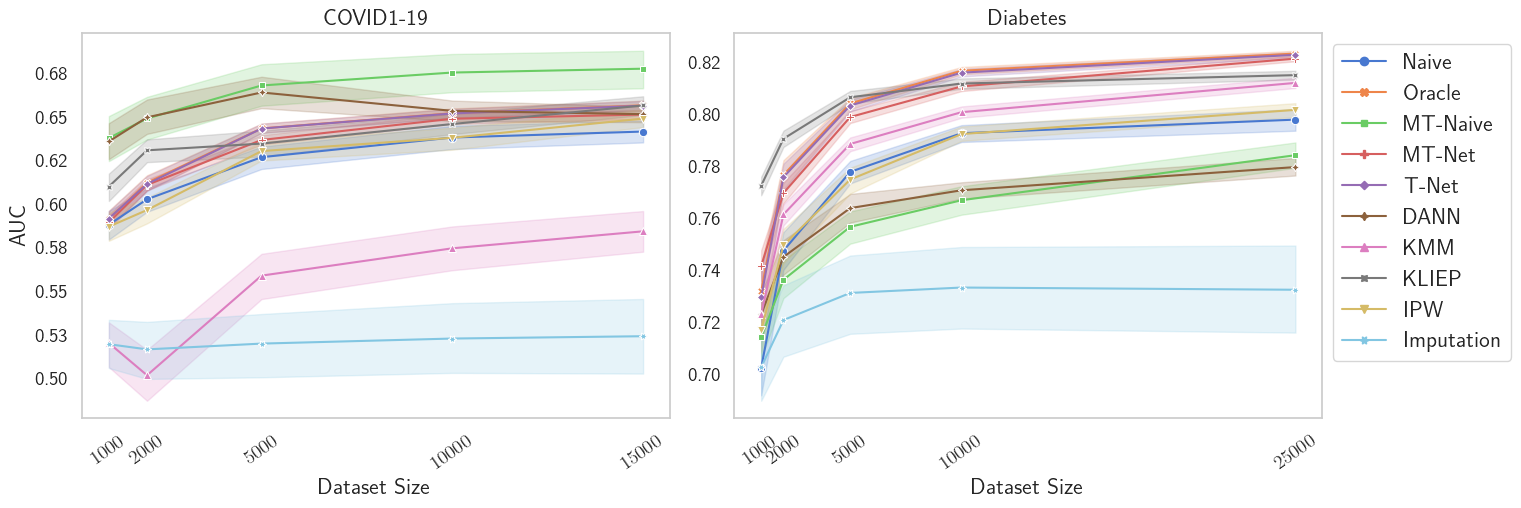

In [87]:
sheet_name ='semi-synthetic-scale'
xticks = [1000, 2000, 5000, 10000, 15000]

# Create the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'wspace': 0.11})

# Plot the first subplot
sns.set_theme(style="whitegrid", palette="muted")
sns.lineplot(x="Dataset Size", 
             y="AUROC",
             hue="Method",
             data=covid, 
             style="Method",
             markers=True, 
             dashes=False,
             ax=axes[0])
axes[0].legend_.remove()#set_title(None)
# axes[0].legend(None, loc='upper center', bbox_to_anchor=(1.17, 1), ncol=1, fontsize=16)
axes[0].set_xlabel('Dataset Size', fontsize=16)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.2f}"))
axes[0].set_ylabel('AUC', fontsize=16)
axes[0].set_xticks(xticks)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].tick_params(axis='x', rotation=35)
axes[0].grid(False)
axes[0].set_title('COVID1-19', fontsize=16)

# Plot the second subplot
# sns.set_theme(style="whitegrid", palette="muted", ax=axes[1])
xticks = [1000, 2000, 5000, 10000, 25000]
sns.lineplot(x="Dataset Size", 
             y="AUROC",
             hue="Method",
             data=Diabetes, 
             style="Method",
             markers=True, 
             dashes=False,
             ax=axes[1])
axes[1].legend_.set_title(None)
axes[1].legend(loc='upper center', bbox_to_anchor=(1.17, 1), ncol=1, fontsize=16)
axes[1].set_xlabel('Dataset Size', fontsize=16)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.2f}"))
axes[1].set_ylabel(None, fontsize=16)
axes[1].set_xticks(xticks)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='x', rotation=35)
axes[1].grid(False)
axes[1].set_title('Diabetes', fontsize=16)

# Save the figure
plt.savefig(sheet_name + '.pdf', dpi=300, bbox_inches='tight')

plt.show()


# The Target Population Identification

In [88]:
dataset = 'Synthetic'

if dataset == 'Synthetic':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Multitasking.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-T.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW.xlsx"


# data from scale settings
# read all
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
# data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
# data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()

df['N'] = data_Adv1['Size']

df['DANN-Overall'] = data_Adv1['Test AUROC-U']
df['DANN-Selected'] = data_Adv1['Test AUROC-U(incl)']
df['DANN-Non-Selected'] = data_Adv1['Test AUROC-U(excl)']

df['KMM-Overall'] = data_kmm1['KMM Test AUROC']
df['KMM-Selected'] = data_kmm1['KMM Test AUROC(incl)']
df['KMM-Non-Selected'] = data_kmm1['KMM Test AUROC(excl)']

df['KLIEP-Overall'] = data_kliep1['KLIEP Test AUROC']
df['KLIEP-Selected'] = data_kliep1['KLIEP Test AUROC(incl)']
df['KLIEP-Non-Selected'] = data_kliep1['KLIEP Test AUROC(excl)']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df_adv = df[['DANN-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['DANN-Overall' for i in range(len(df_adv))]
df_adv.rename(columns={'DANN-Overall': 'AUROC'}, inplace=True)
df_adv_i = df[['DANN-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv_i['Method'] = ['DANN-Selected' for i in range(len(df_adv_i))]
df_adv_i.rename(columns={'DANN-Selected': 'AUROC'}, inplace=True)
df_adv_e = df[['DANN-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv_e['Method'] = ['DANN-Non-Selected' for i in range(len(df_adv_e))]
df_adv_e.rename(columns={'DANN-Non-Selected': 'AUROC'}, inplace=True)

df_kmm = df[['KMM-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM-Overall' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM-Overall': 'AUROC'}, inplace=True)
df_kmm_i = df[['KMM-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm_i['Method'] = ['KMM-Selected' for i in range(len(df_kmm))]
df_kmm_i.rename(columns={'KMM-Selected': 'AUROC'}, inplace=True)
df_kmm_e = df[['KMM-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm_e['Method'] = ['KMM-Non-Selected' for i in range(len(df_kmm))]
df_kmm_e.rename(columns={'KMM-Non-Selected': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP-Overall' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP-Overall': 'AUROC'}, inplace=True)
df_kliep_i = df[['KLIEP-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep_i['Method'] = ['KLIEP-Selected' for i in range(len(df_kliep))]
df_kliep_i.rename(columns={'KLIEP-Selected': 'AUROC'}, inplace=True)
df_kliep_e = df[['KLIEP-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep_e['Method'] = ['KLIEP-Non-Selected' for i in range(len(df_kliep))]
df_kliep_e.rename(columns={'KLIEP-Non-Selected': 'AUROC'}, inplace=True)

synthetic = pd.concat([df_adv, df_adv_i, df_adv_e, df_kliep, df_kliep_i, df_kliep_e, df_kmm, df_kmm_i, df_kmm_e], axis=0, ignore_index=True).reset_index()

###########################################################
####### COVID-19 ###############################
dataset = 'COVID-19'

if dataset =='COVID-19':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-covid.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-covid.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-covid.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-covid.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-covid.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-covid.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-covid.xlsx"

# data from scale settings
# read all
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
# data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
# data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()

df['N'] = data_Adv1['Size']

df['DANN-Overall'] = data_Adv1['Test AUROC-U']
df['DANN-Selected'] = data_Adv1['Test AUROC-U(incl)']
df['DANN-Non-Selected'] = data_Adv1['Test AUROC-U(excl)']

df['KMM-Overall'] = data_kmm1['KMM Test AUROC']
df['KMM-Selected'] = data_kmm1['KMM Test AUROC(incl)']
df['KMM-Non-Selected'] = data_kmm1['KMM Test AUROC(excl)']

df['KLIEP-Overall'] = data_kliep1['KLIEP Test AUROC']
df['KLIEP-Selected'] = data_kliep1['KLIEP Test AUROC(incl)']
df['KLIEP-Non-Selected'] = data_kliep1['KLIEP Test AUROC(excl)']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df_adv = df[['DANN-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['DANN-Overall' for i in range(len(df_adv))]
df_adv.rename(columns={'DANN-Overall': 'AUROC'}, inplace=True)
df_adv_i = df[['DANN-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv_i['Method'] = ['DANN-Selected' for i in range(len(df_adv_i))]
df_adv_i.rename(columns={'DANN-Selected': 'AUROC'}, inplace=True)
df_adv_e = df[['DANN-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv_e['Method'] = ['DANN-Non-Selected' for i in range(len(df_adv_e))]
df_adv_e.rename(columns={'DANN-Non-Selected': 'AUROC'}, inplace=True)

df_kmm = df[['KMM-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM-Overall' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM-Overall': 'AUROC'}, inplace=True)
df_kmm_i = df[['KMM-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm_i['Method'] = ['KMM-Selected' for i in range(len(df_kmm))]
df_kmm_i.rename(columns={'KMM-Selected': 'AUROC'}, inplace=True)
df_kmm_e = df[['KMM-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm_e['Method'] = ['KMM-Non-Selected' for i in range(len(df_kmm))]
df_kmm_e.rename(columns={'KMM-Non-Selected': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP-Overall' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP-Overall': 'AUROC'}, inplace=True)
df_kliep_i = df[['KLIEP-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep_i['Method'] = ['KLIEP-Selected' for i in range(len(df_kliep))]
df_kliep_i.rename(columns={'KLIEP-Selected': 'AUROC'}, inplace=True)
df_kliep_e = df[['KLIEP-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep_e['Method'] = ['KLIEP-Non-Selected' for i in range(len(df_kliep))]
df_kliep_e.rename(columns={'KLIEP-Non-Selected': 'AUROC'}, inplace=True)

covid = pd.concat([df_adv, df_adv_i, df_adv_e, df_kliep, df_kliep_i, df_kliep_e, df_kmm, df_kmm_i, df_kmm_e], axis=0, ignore_index=True).reset_index()

###########################################################
####### Diabetes ###############################
dataset = 'Diabetes'

if dataset =='Diabetes':
    tnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_TNet-diabetes.xlsx"
    mtnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_MTNet-diabetes.xlsx"
    advnet_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Adversarial-diabetes.xlsx"
    kmm_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KMM-diabetes.xlsx"
    kliep_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_KLIEP-diabetes.xlsx"
    impute_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_Imputation-diabetes.xlsx"
    ipw_file1 = r"/home/engs2426/Dropbox/Code/SelectionBias/results/results_IPW-diabetes.xlsx"


# data from scale settings
# read all
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
# data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
# data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()

df['N'] = data_Adv1['Size']

df['DANN-Overall'] = data_Adv1['Test AUROC-U']
df['DANN-Selected'] = data_Adv1['Test AUROC-U(incl)']
df['DANN-Non-Selected'] = data_Adv1['Test AUROC-U(excl)']

df['KMM-Overall'] = data_kmm1['KMM Test AUROC']
df['KMM-Selected'] = data_kmm1['KMM Test AUROC(incl)']
df['KMM-Non-Selected'] = data_kmm1['KMM Test AUROC(excl)']

df['KLIEP-Overall'] = data_kliep1['KLIEP Test AUROC']
df['KLIEP-Selected'] = data_kliep1['KLIEP Test AUROC(incl)']
df['KLIEP-Non-Selected'] = data_kliep1['KLIEP Test AUROC(excl)']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df_adv = df[['DANN-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['DANN-Overall' for i in range(len(df_adv))]
df_adv.rename(columns={'DANN-Overall': 'AUROC'}, inplace=True)
df_adv_i = df[['DANN-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv_i['Method'] = ['DANN-Selected' for i in range(len(df_adv_i))]
df_adv_i.rename(columns={'DANN-Selected': 'AUROC'}, inplace=True)
df_adv_e = df[['DANN-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv_e['Method'] = ['DANN-Non-Selected' for i in range(len(df_adv_e))]
df_adv_e.rename(columns={'DANN-Non-Selected': 'AUROC'}, inplace=True)

df_kmm = df[['KMM-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM-Overall' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM-Overall': 'AUROC'}, inplace=True)
df_kmm_i = df[['KMM-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm_i['Method'] = ['KMM-Selected' for i in range(len(df_kmm))]
df_kmm_i.rename(columns={'KMM-Selected': 'AUROC'}, inplace=True)
df_kmm_e = df[['KMM-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm_e['Method'] = ['KMM-Non-Selected' for i in range(len(df_kmm))]
df_kmm_e.rename(columns={'KMM-Non-Selected': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP-Overall', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP-Overall' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP-Overall': 'AUROC'}, inplace=True)
df_kliep_i = df[['KLIEP-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep_i['Method'] = ['KLIEP-Selected' for i in range(len(df_kliep))]
df_kliep_i.rename(columns={'KLIEP-Selected': 'AUROC'}, inplace=True)
df_kliep_e = df[['KLIEP-Non-Selected', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep_e['Method'] = ['KLIEP-Non-Selected' for i in range(len(df_kliep))]
df_kliep_e.rename(columns={'KLIEP-Non-Selected': 'AUROC'}, inplace=True)

diabetes = pd.concat([df_adv, df_adv_i, df_adv_e, df_kliep, df_kliep_i, df_kliep_e, df_kmm, df_kmm_i, df_kmm_e], axis=0, ignore_index=True).reset_index()

##########################################

synthetic['Dataset'] = ['Synthetic' for i in range(synthetic.shape[0])]
covid['Dataset'] = ['COVID-19' for i in range(covid.shape[0])]
diabetes['Dataset'] = ['Diabetes' for i in range(diabetes.shape[0])]

data = pd.concat([synthetic, covid, diabetes], axis=0, ignore_index=True).reset_index()

data

,level_0,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method,Dataset
0,0,0,0.894583,1000.0,0.05,0.05,DANN-Overall,Synthetic
1,1,1,0.702635,1000.0,0.05,0.05,DANN-Overall,Synthetic
2,2,2,0.882544,1000.0,0.05,0.05,DANN-Overall,Synthetic
3,3,3,0.623236,1000.0,0.05,0.05,DANN-Overall,Synthetic
4,4,4,0.895353,1000.0,0.05,0.05,DANN-Overall,Synthetic
...,...,...,...,...,...,...,...,...
33745,33745,11245,0.725275,1000.0,0.40,0.40,KMM-Non-Selected,Diabetes
33746,33746,11246,0.714887,1000.0,0.40,0.40,KMM-Non-Selected,Diabetes
33747,33747,11247,0.727623,1000.0,0.40,0.40,KMM-Non-Selected,Diabetes
33748,33748,11248,0.716953,1000.0,0.40,0.40,KMM-Non-Selected,Diabetes


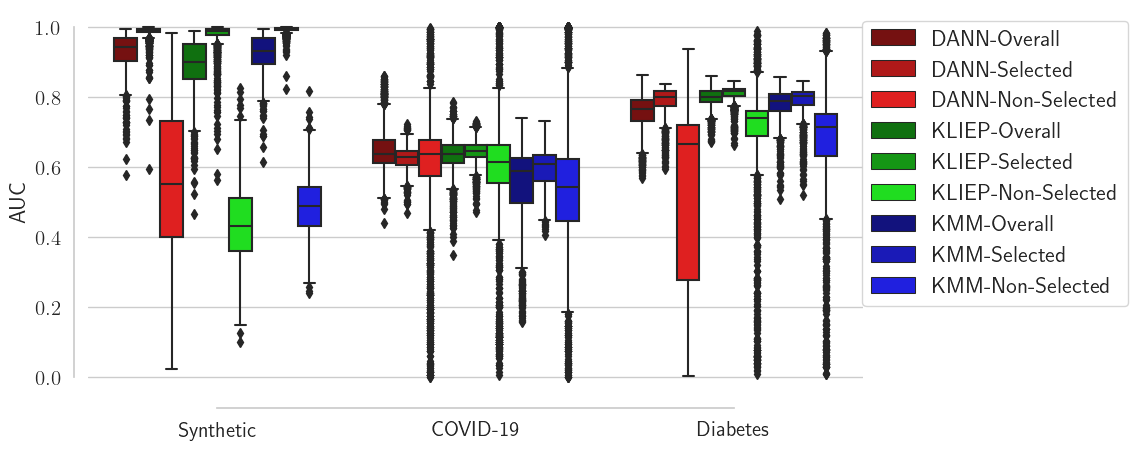

In [89]:
#########################################################
ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(10,5))
# sns.set(font_scale = 10)
# sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="whitegrid", palette="muted")
# sns.set(style="darkgrid")
palette = ['#860000', '#c80000', '#ff0000', '#008000', '#00ab00', '#00fd00', '#00008f', '#0000d1', '#0000ff']

# plot AUROC
p = sns.boxplot(x="Dataset", y="AUROC", hue="Method",
            palette=palette,#sns.color_palette(),
            data=data)
sns.despine(offset=10, trim=True)
# p.set_ylabel("AUROC", fontsize = 20)
# p.set_xlabel("% Irregularity", fontsize = 20)
# p.set_title("Plot", fontsize = 20)
# plt.legend(labels=["COPER","Perceiver","LSTM"], fontsize = 20)

# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3, frameon=False, fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1), ncol=1, fontsize=16)
# plt.legend(loc="lower left", frameon=True, fontsize=16)
# plt.xlabel('Model', fontsize=16)
ax.set(xlabel=None)
plt.ylabel('AUC', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)#, ticks=np.arange(0.55, 1, step=0.05))
# plt.title('COVID-19', fontsize = 20)
plt.savefig('IncludedvsExcluded.pdf', dpi=300,bbox_inches='tight')

#######################################################################################

In [90]:
data.groupby(by=['Dataset', 'Method']).mean()

level_0    index     AUROC  Dataset Size  \
Dataset   Method                                                         
COVID-19  DANN-Non-Selected   14374.5   3124.5  0.590598        6600.0   
          DANN-Overall        11874.5    624.5  0.650619        6600.0   
          DANN-Selected       13124.5   1874.5  0.623175        6600.0   
          KLIEP-Non-Selected  18124.5   6874.5  0.592764        6600.0   
          KLIEP-Overall       15624.5   4374.5  0.633094        6600.0   
          KLIEP-Selected      16874.5   5624.5  0.643803        6600.0   
          KMM-Non-Selected    21874.5  10624.5  0.551034        6600.0   
          KMM-Overall         19374.5   8124.5  0.547830        6600.0   
          KMM-Selected        20624.5   9374.5  0.595203        6600.0   
Diabetes  DANN-Non-Selected   25624.5   3124.5  0.526655        8600.0   
          DANN-Overall        23124.5    624.5  0.756304        8600.0   
          DANN-Selected       24374.5   1874.5  0.787960        8600.0   
          KLIEP-Non-Selected  29374.5   6874.5  0.684375        8600.0   
          KLIEP-Overall       26874.5   4374.5  0.797358        8600.0   
          KLIEP-Selected      28124.5   5624.5  0.809514        8600.0   
          KMM-Non-Selected    33124.5  10624.5  0.665576        8600.0   
          KMM-Overall         30624.5   8124.5  0.777002        8600.0   
          KMM-Selected        31874.5   9374.5  0.788519        8600.0   
Synthetic DANN-Non-Selected    3124.5   3124.5  0.564456        3000.0   
          DANN-Overall          624.5    624.5  0.928945        3000.0   
          DANN-Selected        1874.5   1874.5  0.985637        3000.0   
          KLIEP-Non-Selected   6874.5   6874.5  0.436850        3000.0   
          KLIEP-Overall        4374.5   4374.5  0.889684        3000.0   
          KLIEP-Selected       5624.5   5624.5  0.975148        3000.0   
          KMM-Non-Selected    10624.5  10624.5  0.488263        3000.0   
          KMM-Overall          8124.5   8124.5  0.924573        3000.0   
          KMM-Selected         9374.5   9374.5  0.991159        3000.0   

                              Risk Rate  Censoring Rate  
Dataset   Method                                         
COVID-19  DANN-Non-Selected        0.21            0.21  
          DANN-Overall             0.21            0.21  
          DANN-Selected            0.21            0.21  
          KLIEP-Non-Selected       0.21            0.21  
          KLIEP-Overall            0.21            0.21  
          KLIEP-Selected           0.21            0.21  
          KMM-Non-Selected         0.21            0.21  
          KMM-Overall              0.21            0.21  
          KMM-Selected             0.21            0.21  
Diabetes  DANN-Non-Selected        0.21            0.21  
          DANN-Overall             0.21            0.21  
          DANN-Selected            0.21            0.21  
          KLIEP-Non-Selected       0.21            0.21  
          KLIEP-Overall            0.21            0.21  
          KLIEP-Selected           0.21            0.21  
          KMM-Non-Selected         0.21            0.21  
          KMM-Overall              0.21            0.21  
          KMM-Selected             0.21            0.21  
Synthetic DANN-Non-Selected        0.21            0.21  
          DANN-Overall             0.21            0.21  
          DANN-Selected            0.21            0.21  
          KLIEP-Non-Selected       0.21            0.21  
          KLIEP-Overall            0.21            0.21  
          KLIEP-Selected           0.21            0.21  
          KMM-Non-Selected         0.21            0.21  
          KMM-Overall              0.21            0.21  
          KMM-Selected             0.21            0.21